In [1]:
# Seleccionar un conjunto de datos de algún repositorio público o de alguna fuente propia.
import requests
url="https://raw.githubusercontent.com/crozasc/t2/main/CausesOfDeath_France_2001-2008.csv"
target_csv_path="CausesOfDeath_France_2001-2008.csv"

response= requests.get(url)

response.raise_for_status()
with open(target_csv_path,"wb") as f:
    f.write(response.content)
print("CSV descargado correctamente")

CSV descargado correctamente


In [1]:
# Cargar los datos desde la fuente en su respectivo formato a un dataframe.
import pandas as pd

# Utilizar los métodos pandas.read_xxx() y pandas.to_xxx() para leer y guardar los datos.
df = pd.read_csv("CausesOfDeath_France_2001-2008.csv")
df.head()

,2001,France,Number,Males,Total,All causes of death (A00-Y89) excluding S00-T98,277 858,?
0,2001,France,Number,Males,Total,Certain infectious and parasitic diseases (A00...,5 347,?
1,2001,France,Number,Males,Total,Tuberculosis,545,NaN
2,2001,France,Number,Males,Total,Meningococcal infection,30,NaN
3,2001,France,Number,Males,Total,Viral hepatitis,471,NaN
4,2001,France,Number,Males,Total,Human immunodeficiency virus [HIV] disease,892,NaN


In [2]:
# Revisar si los datos de entrada tienen o no un encabezado. De no ser así, corregir esta situación.
aux = df.columns.tolist()
header = ["TIME","GEO","UNIT","SEX","AGE","ICD10","Value","Flag and Footnotes"]
if aux!=header:
    df.loc[-1] = aux
    df.index = df.index + 1  
    df = df.sort_index()  
    df.columns = header
df.head()

,TIME,GEO,UNIT,SEX,AGE,ICD10,Value,Flag and Footnotes
0,2001,France,Number,Males,Total,All causes of death (A00-Y89) excluding S00-T98,277 858,?
1,2001,France,Number,Males,Total,Certain infectious and parasitic diseases (A00...,5 347,?
2,2001,France,Number,Males,Total,Tuberculosis,545,NaN
3,2001,France,Number,Males,Total,Meningococcal infection,30,NaN
4,2001,France,Number,Males,Total,Viral hepatitis,471,NaN


In [3]:
# Realizar un análisis básico de los datos de entrada con con los métodos .describe() y .info().
df.describe()

,TIME,GEO,UNIT,SEX,AGE,ICD10,Value,Flag and Footnotes
count,1056,1056,1056,1056,1056,1056,1056,2
unique,9,1,1,2,1,66,945,1
top,2002,France,Number,Males,Total,All causes of death (A00-Y89) excluding S00-T98,:,?
freq,132,1056,1056,528,1056,16,40,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 1055
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   TIME                1056 non-null   object
 1   GEO                 1056 non-null   object
 2   UNIT                1056 non-null   object
 3   SEX                 1056 non-null   object
 4   AGE                 1056 non-null   object
 5   ICD10               1056 non-null   object
 6   Value               1056 non-null   object
 7   Flag and Footnotes  2 non-null      object
dtypes: object(8)
memory usage: 74.2+ KB


In [5]:
# Identificar y manipular valores faltantes.
import numpy as np
#a) Identificar valores faltantes.
df.replace(":", 0, inplace = True)
df.replace("?", np.nan, inplace = True)
df.head(5)

,TIME,GEO,UNIT,SEX,AGE,ICD10,Value,Flag and Footnotes
0,2001,France,Number,Males,Total,All causes of death (A00-Y89) excluding S00-T98,277 858,NaN
1,2001,France,Number,Males,Total,Certain infectious and parasitic diseases (A00...,5 347,NaN
2,2001,France,Number,Males,Total,Tuberculosis,545,NaN
3,2001,France,Number,Males,Total,Meningococcal infection,30,NaN
4,2001,France,Number,Males,Total,Viral hepatitis,471,NaN


In [6]:
#Manipular valores faltantes.
del df["Flag and Footnotes"]
del df["UNIT"]
del df["AGE"]

In [7]:
#Quitar espacios en Value para usar como int
df['Value'] = df['Value'].str.replace('\s+', '')
prom_Value = df['Value'].astype('float').mean(axis=0)
prom_Value = int(prom_Value)
df['Value'].replace(np.nan, prom_Value, inplace = True)
df.head(5)

C:\Users\croza\AppData\Local\Temp\ipykernel_56964\2155249553.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Value'] = df['Value'].str.replace('\s+', '')


,TIME,GEO,SEX,ICD10,Value
0,2001,France,Males,All causes of death (A00-Y89) excluding S00-T98,277858
1,2001,France,Males,Certain infectious and parasitic diseases (A00...,5347
2,2001,France,Males,Tuberculosis,545
3,2001,France,Males,Meningococcal infection,30
4,2001,France,Males,Viral hepatitis,471


In [8]:
df.dtypes

TIME     object
GEO      object
SEX      object
ICD10    object
Value    object
dtype: object

In [9]:
# Corregir el formato de los datos.
df[["TIME","Value"]] = df[["TIME","Value"]].astype("int")
df.dtypes

TIME      int32
GEO      object
SEX      object
ICD10    object
Value     int32
dtype: object

In [ ]:
#Estandarizar datos de entrada.

In [ ]:
# Normalizar datos de entrada.

Text(0.5, 1.0, 'Muertes por causa')

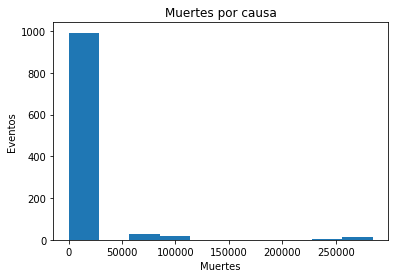

In [10]:
# Agrupar datos de entrada.
%matplotlib inline
import matplotlib as plt
plt.pyplot.hist(df["Value"])
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Muertes")
plt.pyplot.ylabel("Eventos")
plt.pyplot.title("Muertes por causa")


Text(0.5, 1.0, 'Muertes por causa')

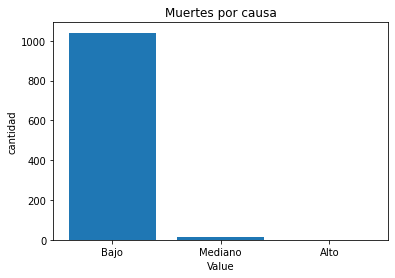

In [11]:
contenedores = np.linspace(min(df["Value"]), max(df["Value"]), 4)
nombres_de_grupo = ['Bajo', 'Mediano', 'Alto']
df['Value-binned'] = pd.cut(df['Value'], contenedores, labels=nombres_de_grupo, include_lowest=True )

plt.pyplot.bar(nombres_de_grupo, df["Value-binned"].value_counts())
# setear las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("Value")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Muertes por causa")

In [12]:
df.head()

,TIME,GEO,SEX,ICD10,Value,Value-binned
0,2001,France,Males,All causes of death (A00-Y89) excluding S00-T98,277858,Alto
1,2001,France,Males,Certain infectious and parasitic diseases (A00...,5347,Bajo
2,2001,France,Males,Tuberculosis,545,Bajo
3,2001,France,Males,Meningococcal infection,30,Bajo
4,2001,France,Males,Viral hepatitis,471,Bajo


In [13]:
#  Generar variables indicadoras.
variable_dummy_1 = pd.get_dummies(df["SEX"])
variable_dummy_1.head()

,Females,Males
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [14]:
variable_dummy_1.rename(columns={'Males':'Only males', 'Females':'Only females'}, inplace=True)
# combinar los dataframes "df" y "variable_dummy_1" 
df = pd.concat([df, variable_dummy_1], axis=1)

# Elimina la columna original "fuel-type" del dataframe "df"
df.drop("SEX", axis = 1, inplace=True)
df.head()

,TIME,GEO,ICD10,Value,Value-binned,Only females,Only males
0,2001,France,All causes of death (A00-Y89) excluding S00-T98,277858,Alto,0,1
1,2001,France,Certain infectious and parasitic diseases (A00...,5347,Bajo,0,1
2,2001,France,Tuberculosis,545,Bajo,0,1
3,2001,France,Meningococcal infection,30,Bajo,0,1
4,2001,France,Viral hepatitis,471,Bajo,0,1


In [15]:
# Guardar el conjunto de datos procesado.
df.to_csv('New.csv')